In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utilities import Stats, LoadDisorderOperator

In [2]:
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.legend_handler import HandlerTuple
def update_mpl_param(axeslabel, legend, xtick, ytick):
    pgf_with_latex = {                      # setup matplotlib to use latex for output
        "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
        "text.usetex": True,                # use LaTeX to write all text
        "font.family": "serif",
        "font.serif": [],                   # blank entries should cause plots 
        "font.sans-serif": [],              # to inherit fonts from the document
        "font.monospace": [],
        "axes.labelsize": axeslabel,               # LaTeX default is 10pt font.
        "font.size": 14,
        "legend.fontsize": legend,               # Make the legend/label fonts 
        "xtick.labelsize": xtick,               # a little smaller
        "ytick.labelsize": ytick,    # default fig size of 0.9 textwidth
        "pgf.preamble": "\n".join([ # plots will use this preamble
            ])
        }
    mpl.rcParams.update(pgf_with_latex)

update_mpl_param(14,12,12,12)

In [8]:
Ne = 37
bd_37 = np.arange(0.08,0.35,0.01)

x_cfl0_37, entropy_cfl0_37 = LoadDisorderOperator(Ne, 2*Ne, 5e6, 1e5, 1j, 'circle', 'cfl0', bd_37)
x_cfl2_37, entropy_cfl2_37 = LoadDisorderOperator(Ne, 2*Ne, 5e6, 1e5, 1j, 'circle', 'cfl2', bd_37)
x_ff_37, entropy_ff_37 = LoadDisorderOperator(Ne, 2*Ne, 10e6, 1e5, 1j, 'circle', 'free_fermions', bd_37)

Ne = 69
bd_69 = np.arange(0.06,0.271,0.01)

x_cfl0_69, entropy_cfl0_69 = LoadDisorderOperator(Ne, 2*Ne, 10e6, 1e5, 1j, 'circle', 'cfl0', bd_69)
x_ff_69, entropy_ff_69 = LoadDisorderOperator(Ne, 2*Ne, 20e6, 1e5, 1j, 'circle', 'free_fermions', bd_69)

In [11]:
popt_cfl0_37, pcov_cfl0_37 = np.polyfit(np.log(x_cfl0_37), entropy_cfl0_37[:,0]/x_cfl0_37, deg=1, cov=True, w=1/entropy_cfl0_37[:,1])
popt_cfl2_37, pcov_cfl2_37 = np.polyfit(np.log(x_cfl2_37), entropy_cfl2_37[:,0]/x_cfl2_37, deg=1, cov=True, w=1/entropy_cfl2_37[:,1])
popt_ff_37, pcov_ff_37 = np.polyfit(np.log(x_ff_37), entropy_ff_37[:,0]/x_ff_37, deg=1, cov=True, w=1/entropy_ff_37[:,1])

x_fit_37 = np.linspace(0.4, 1.9,2)
y_fit_cfl0_37 = x_fit_37*popt_cfl0_37[0] + popt_cfl0_37[1]
y_fit_cfl2_37 = x_fit_37*popt_cfl2_37[0] + popt_cfl2_37[1]
y_fit_ff_37 = x_fit_37*popt_ff_37[0] + popt_ff_37[1]

popt_cfl0_69, pcov_cfl0_69 = np.polyfit(np.log(x_cfl0_69), entropy_cfl0_69[:,0]/x_cfl0_69, deg=1, cov=True, w=1/entropy_cfl0_69[:,1])
popt_ff_69, pcov_ff_69 = np.polyfit(np.log(x_ff_69), entropy_ff_69[:,0]/x_ff_69, deg=1, cov=True, w=1/entropy_ff_69[:,1])

x_fit_69 = np.linspace(0.5, 2.1,2)
y_fit_cfl0_69 = x_fit_69*popt_cfl0_69[0] + popt_cfl0_69[1]
y_fit_ff_69 = x_fit_69*popt_ff_69[0] + popt_ff_69[1]

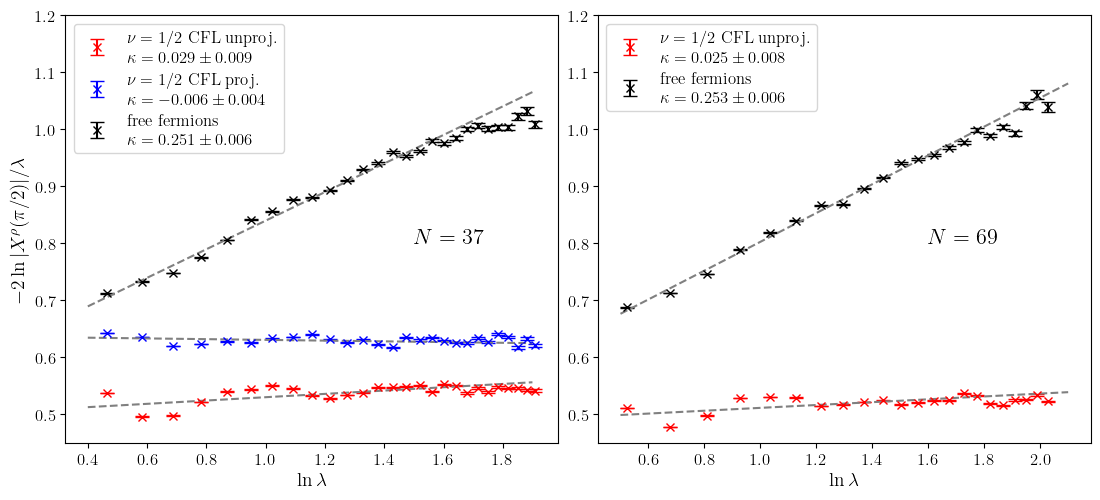

In [18]:
fig, ax = plt.subplots(1,2, figsize=(11,5))

ax[0].errorbar(np.log(x_cfl0_37), (entropy_cfl0_37[:,0]/x_cfl0_37), entropy_cfl0_37[:,1], marker='x',
             color='red', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL unproj. \n $\kappa = {popt_cfl0_37[0]:.3f} \\pm {np.sqrt(pcov_cfl0_37[0,0]):.3f}$')
ax[0].errorbar(np.log(x_cfl2_37), (entropy_cfl2_37[:,0]/x_cfl2_37), entropy_cfl2_37[:,1], marker='x',
             color='blue', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL proj. \n $\kappa = {popt_cfl2_37[0]:.3f} \\pm {np.sqrt(pcov_cfl2_37[0,0]):.3f}$')
ax[0].errorbar(np.log(x_ff_37), (entropy_ff_37[:,0]/x_ff_37), entropy_ff_37[:,1], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\kappa = {popt_ff_37[0]:.3f} \\pm {np.sqrt(pcov_ff_37[0,0]):.3f}$')
#ax[0].text(1.2, 1.55, "total", fontsize=16)
ax[0].plot(x_fit_37, y_fit_cfl0_37, '--', c='gray')
ax[0].plot(x_fit_37, y_fit_cfl2_37, '--', c='gray')
ax[0].plot(x_fit_37, y_fit_ff_37, '--', c='gray')

ax[0].legend(loc='upper left')

#ax[1].errorbar(x_ff, (entropy_cfl2[:,0] - entropy_ff[:,0])/entropy_ff[:,0], entropy_cfl2[:,1],
#               marker='x')
ax[0].set_xlabel("$\\ln \\lambda$")
ax[0].set_ylabel("$-2 \\ln |X^{\\rho} (\\pi/2)| /\\lambda$")
ax[0].set_ylim(0.45, 1.2)
ax[0].text(1.5, 0.8, '$N=37$', fontsize=16)


ax[1].errorbar(np.log(x_cfl0_69), (entropy_cfl0_69[:,0]/x_cfl0_69), entropy_cfl0_69[:,1], marker='x',
             color='red', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'$\\nu = 1/2$ CFL unproj. \n $\kappa = {popt_cfl0_69[0]:.3f} \\pm {np.sqrt(pcov_cfl0_69[0,0]):.3f}$')
ax[1].errorbar(np.log(x_ff_69), (entropy_ff_69[:,0]/x_ff_69), entropy_ff_69[:,1], marker='x',
             color='black', markersize=6, capsize=5, linestyle='none', markerfacecolor='none',
             label=f'free fermions \n $\kappa = {popt_ff_69[0]:.3f} \\pm {np.sqrt(pcov_ff_69[0,0]):.3f}$')
#ax[0].text(1.2, 1.55, "total", fontsize=16)
ax[1].plot(x_fit_69, y_fit_cfl0_69, '--', c='gray')
ax[1].plot(x_fit_69, y_fit_ff_69, '--', c='gray')

ax[1].legend(loc='upper left')

#ax[1].errorbar(x_ff, (entropy_cfl2[:,0] - entropy_ff[:,0])/entropy_ff[:,0], entropy_cfl2[:,1],
#               marker='x')
ax[1].set_xlabel("$\\ln \\lambda$")
#ax[1].set_ylabel("$-2 \\ln |X^{\\rho} (\\pi/2)| /\\lambda$")
ax[1].text(1.6, 0.8, '$N=69$', fontsize=16)

ax[1].set_ylim(0.45, 1.2)

fig.tight_layout(pad=0.5)
plt.savefig("disorder operator m=2.pdf")